In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
dados = pd.read_csv('segmentacao.zip',compression="zip")
dados

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,"1488,00"


In [3]:
dados.dropna(axis=0,inplace=True)
dados = dados.drop('N° da fatura',axis=1)
dados

,Data da fatura,ID Cliente,País,Quantidade,Valor
0,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
...,...,...,...,...,...
25947,5/17/2021 14:16:00,18218.0,United Kingdom,-2,"-9,90"
25948,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"


In [4]:
qtd_vendas = len(dados["País"])
data = dados["Data da fatura"]
pais = dados["País"]
quantidade = dados["Quantidade"]
valor = dados["Valor"]
pais = pais.drop_duplicates()
quantidade = quantidade.sum()
valor = valor.sum()

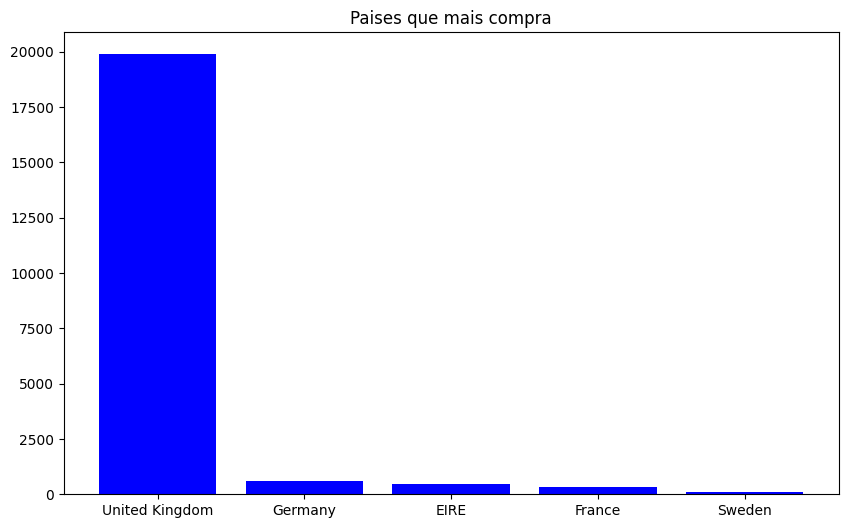

In [5]:
qtd_compra_pais = dados["País"].value_counts().head()
nome_pais = pais.head()
for c in enumerate(pais):
    c
plt.figure(figsize=(10,6))
plt.bar(nome_pais,qtd_compra_pais,color='blue')
plt.title('Paises que mais compra')
plt.show()

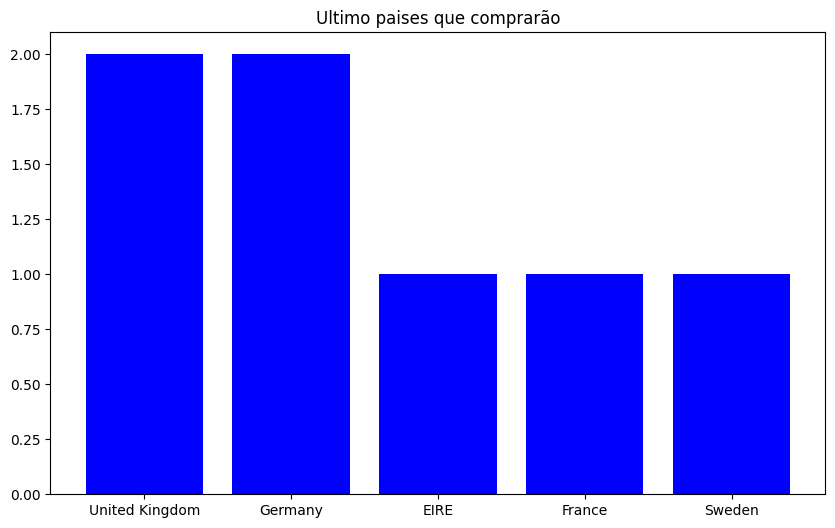

In [6]:
paises_compra_menos = dados["País"].value_counts().tail()
nomes_ultimos = pais.tail()
plt.figure(figsize=(10,6))
plt.bar(nome_pais,paises_compra_menos,color='blue')
plt.title('Ultimo paises que comprarão')
plt.show()

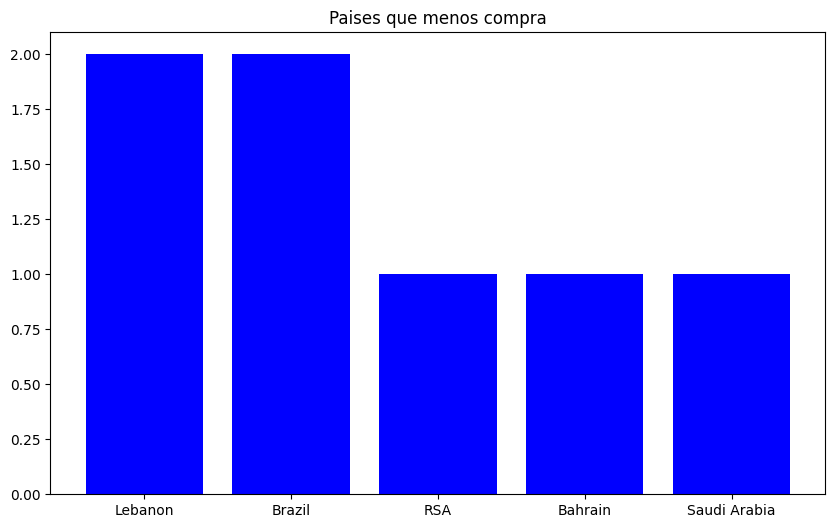

In [7]:
maior_menor = dados["País"].value_counts()
paises_que_menos_comprarao = maior_menor.tail()
plt.figure(figsize=(10,6))
plt.bar(nomes_ultimos,paises_que_menos_comprarao,color='blue')
plt.title('Paises que menos compra')
plt.show()

In [8]:
onehot = OneHotEncoder(sparse=False,drop='first')
minmax = MinMaxScaler()

In [9]:
dados['País'].value_counts()

United Kingdom          19891
Germany                   603
France                    459
EIRE                      321
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            34
Japan                      29
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Malta                      10
Singapore                  10
Unspecified                 8
Iceland                     7
USA                         7
Greece                      6
Canada                      6
Israel                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Bahrain                     2
Saudi Arab

In [ ]:
x = dados.drop('Quantidade',axis=1)
x_minmax = dados.select_dtypes(exclude='object')
x_minmax = minmax.fit_transform(x_minmax)
x = x_minmax
y = dados['Quantidade']

In [ ]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=2/3,random_state=1)
cerebro = SVC()
cerebro.fit(x_treino,y_treino)
accuracy_score(y_teste,cerebro.predict(x_teste))